In [404]:
import sys
import pandas as pd
import mysql.connector
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

mydb = mysql.connector.connect(
  host="172.28.200.50",
  user="root",
  passwd="insert-password-here",
  database="iiwari_org")


mycursor = mydb.cursor(dictionary=True)
mycursor.execute("SELECT node_id, timestamp, x,y,z,q FROM SensorData LIMIT 500000 ;" );
df = pd.DataFrame(mycursor.fetchall())
df


,node_id,timestamp,x,y,z,q
0,b'-2393099149039893833',b'2020-06-24 12:20:08.533016+00:00',2762,-257,100,0
1,b'-2393099149039893833',b'2020-06-24 12:20:08.620015+00:00',2870,-344,100,0
2,b'-2393099149039893833',b'2020-06-24 12:20:09.622827+00:00',2916,-344,100,0
3,b'-2393099149039893833',b'2020-06-24 12:20:09.622846+00:00',2894,-254,100,0
4,b'-2393099149039893833',b'2020-06-24 12:20:10.116102+00:00',2888,-188,100,0
...,...,...,...,...,...,...
499995,b'-2393099149039893833',b'2020-10-10 10:53:36.062033+00:00',1787,-178,100,0
499996,b'-2393099149039893833',b'2020-10-10 10:53:42.062113+00:00',1785,-203,100,0
499997,b'-2393099149039893833',b'2020-10-10 10:53:43.06189+00:00',1785,-210,100,0
499998,b'-2393099149039893833',b'2020-10-10 10:53:44.062039+00:00',1779,-219,100,0


In [405]:
df['timestamp'] = df['timestamp'].astype('str')
df['timestamp'] = df['timestamp'].astype('string')
df['timestamp'] = df['timestamp'].str.lstrip("b'")
df['timestamp'] = df['timestamp'].str.rstrip("'+00:00'")
df['timestamp'] = df['timestamp'].astype('datetime64[s]')

    # #Lisätään UTC-timezone takaisin
df.timestamp = df.timestamp.dt.tz_localize('UTC')

    # Muunnetaan Suomen aikaan. Tämä huomioi kesä- ja talviajan.
df.timestamp = df.timestamp.dt.tz_convert('Europe/Helsinki')

df['node_id'] = pd.factorize(df['node_id'])[0] + 1 #Muutetaan node_id:t kivempiin lukuihin

df

,node_id,timestamp,x,y,z,q
0,1,2020-06-24 15:20:08+03:00,2762,-257,100,0
1,1,2020-06-24 15:20:08+03:00,2870,-344,100,0
2,1,2020-06-24 15:20:09+03:00,2916,-344,100,0
3,1,2020-06-24 15:20:09+03:00,2894,-254,100,0
4,1,2020-06-24 15:20:10+03:00,2888,-188,100,0
...,...,...,...,...,...,...
499995,1,2020-10-10 13:53:36+03:00,1787,-178,100,0
499996,1,2020-10-10 13:53:42+03:00,1785,-203,100,0
499997,1,2020-10-10 13:53:43+03:00,1785,-210,100,0
499998,1,2020-10-10 13:53:44+03:00,1779,-219,100,0


In [420]:
df['viikonpäivä'] = df['timestamp'].dt.dayofweek


In [421]:
df.head(243)

,node_id,timestamp,x,y,z,q,viikonpäivä
0,1,2020-06-24 15:20:08+03:00,2762,-257,100,0,2
1,1,2020-06-24 15:20:08+03:00,2870,-344,100,0,2
2,1,2020-06-24 15:20:09+03:00,2916,-344,100,0,2
3,1,2020-06-24 15:20:09+03:00,2894,-254,100,0,2
4,1,2020-06-24 15:20:10+03:00,2888,-188,100,0,2
...,...,...,...,...,...,...,...
238,1,2020-06-24 15:33:03+03:00,2932,-132,100,0,2
239,1,2020-06-24 15:33:05+03:00,2935,-309,100,0,2
240,1,2020-06-24 15:33:06+03:00,2896,-308,100,0,2
241,1,2020-06-24 15:33:06+03:00,2886,-347,100,0,2


In [408]:
df.tail(3400)

,node_id,timestamp,x,y,z,q,viikonpäivä
496600,1,2020-10-10 08:23:02+03:00,2783,-331,100,0,5
496601,1,2020-10-10 08:23:21+03:00,2773,-338,100,0,5
496602,1,2020-10-10 08:23:40+03:00,2772,-339,100,0,5
496603,1,2020-10-10 08:23:50+03:00,2773,-337,100,0,5
496604,1,2020-10-10 08:24:09+03:00,2772,-337,100,0,5
...,...,...,...,...,...,...,...
499995,1,2020-10-10 13:53:36+03:00,1787,-178,100,0,5
499996,1,2020-10-10 13:53:42+03:00,1785,-203,100,0,5
499997,1,2020-10-10 13:53:43+03:00,1785,-210,100,0,5
499998,1,2020-10-10 13:53:44+03:00,1779,-219,100,0,5


In [409]:
class karry:
    def __init__(self, ajokerta):
        self.ajokerta = ajokerta
        self.node_id = []
        self.timestamp = []
        self.x = []
        self.y = []

    def lisaa(self, node_id, timestamp, x, y):
        self.node_id.append(node_id)
        self.timestamp.append(timestamp)
        self.x.append(x)
        self.y.append(y)
karrylista = []      #tähän tallennetaan kärryt
ajokerta = 0   # pidetään kirjaa kuinka monta kertaa kärry on ajanut kaupan läpi. Käytetään Kärryjen etsimiseen ja erotteluun
Karry = karry(ajokerta)      #luodaan karry
karrylista.append(Karry)     #lisätään ensimmäinen karry listaan, koska data alkaa yleensä kesken ajokerran
# Tarvitaan dataframe!
for i in range(len(df)-1): # -1 koska lasketaan seuraava rivi - nykyinen rivi 
    erotus = str(df.timestamp[i+1] - df.timestamp[i]) # lasketaan seuraavan rivin ja nykyisen rivin aika-erotus
    if erotus < "0 days 00:01:00":
        karrylista[ajokerta].lisaa(df.node_id[i], df.timestamp[i],df.x[i], df.y[i]) 
    else: #Luodaan uusi karry, jos erotus on ylittää annetun arvon 
        ajokerta += 1   #seuraaava ajokerta
        Karry = karry(ajokerta)      #luodaan uusi karry
        karrylista.append(Karry)     #Lisätään Kärry listaan

In [410]:
alo = []
lapimenoajat = []

for i in range(len(karrylista)):
    if len(karrylista[i].node_id) > 100:
        
        alotus = karrylista[i].timestamp[0]
        lopetus = karrylista[i].timestamp[-1]
        lapimenoaika = (lopetus - alotus)
        alo.append(alotus)
        lapimenoajat.append(lapimenoaika)
        
alotukset = {"Aloitus":alo }
Lapimenot = {"Lapimenoajat":lapimenoajat}

print("Läpimenoajat", lapimenoajat)        

Läpimenoajat [Timedelta('0 days 00:12:58'), Timedelta('0 days 00:16:42'), Timedelta('0 days 01:47:22'), Timedelta('0 days 00:58:38'), Timedelta('0 days 00:27:43'), Timedelta('0 days 01:59:35'), Timedelta('0 days 00:34:20'), Timedelta('0 days 04:45:00'), Timedelta('0 days 01:35:30'), Timedelta('0 days 00:12:42'), Timedelta('0 days 00:50:19'), Timedelta('0 days 00:10:36'), Timedelta('0 days 00:44:00'), Timedelta('0 days 00:12:12'), Timedelta('0 days 02:16:42'), Timedelta('0 days 00:34:44'), Timedelta('0 days 00:12:25'), Timedelta('0 days 00:19:37'), Timedelta('0 days 00:30:44'), Timedelta('0 days 00:27:02'), Timedelta('0 days 00:22:11'), Timedelta('0 days 00:35:48'), Timedelta('0 days 00:23:42'), Timedelta('0 days 01:39:27'), Timedelta('0 days 01:24:39'), Timedelta('0 days 00:14:57'), Timedelta('0 days 00:14:29'), Timedelta('0 days 00:24:56'), Timedelta('0 days 00:05:42'), Timedelta('0 days 00:18:43'), Timedelta('0 days 05:48:31'), Timedelta('0 days 00:34:45'), Timedelta('0 days 01:23:23

In [411]:
df2 = pd.DataFrame(alotukset)
df2["Kesto"] = pd.DataFrame(Lapimenot)

df2

,Aloitus,Kesto
0,2020-06-24 15:20:08+03:00,00:12:58
1,2020-06-25 07:51:52+03:00,00:16:42
2,2020-06-25 09:17:23+03:00,01:47:22
3,2020-06-25 12:25:04+03:00,00:58:38
4,2020-06-25 15:21:24+03:00,00:27:43
...,...,...
664,2020-10-09 18:29:00+03:00,00:06:23
665,2020-10-09 19:00:41+03:00,00:26:48
666,2020-10-09 19:53:35+03:00,01:21:09
667,2020-10-10 05:50:18+03:00,07:49:48


In [412]:
df2['dates'] = df['timestamp'].dt.date
df2['h'] = df2['Aloitus'].dt.strftime('%H').astype('float')
df2

,Aloitus,Kesto,dates,h
0,2020-06-24 15:20:08+03:00,00:12:58,2020-06-24,15.0
1,2020-06-25 07:51:52+03:00,00:16:42,2020-06-24,7.0
2,2020-06-25 09:17:23+03:00,01:47:22,2020-06-24,9.0
3,2020-06-25 12:25:04+03:00,00:58:38,2020-06-24,12.0
4,2020-06-25 15:21:24+03:00,00:27:43,2020-06-24,15.0
...,...,...,...,...
664,2020-10-09 18:29:00+03:00,00:06:23,2020-06-25,18.0
665,2020-10-09 19:00:41+03:00,00:26:48,2020-06-25,19.0
666,2020-10-09 19:53:35+03:00,01:21:09,2020-06-25,19.0
667,2020-10-10 05:50:18+03:00,07:49:48,2020-06-25,5.0


In [414]:
df2_aika = [8, 11, 13, 15, 17, 19, 21]
df2_ajat = pd.cut(df2['h'], df2_aika)
df2_aikavälit = {"Läpimenoaika" :[df2_ajat, df2['Kesto'].mean()]}

df2["aikavälit"] = pd.DataFrame(df2_aikavälit)
df2["aikavälit"]


0      0      (13.0, 15.0]
1               NaN
2     ...
1                                 0 days 01:09:04.101644
2                                                    NaN
3                                                    NaN
4                                                    NaN
                             ...                        
664                                                  NaN
665                                                  NaN
666                                                  NaN
667                                                  NaN
668                                                  NaN
Name: aikavälit, Length: 669, dtype: object

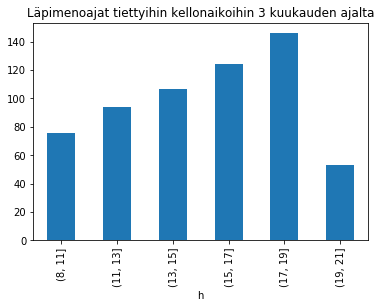

In [415]:


plot_df2 = df2.groupby(df2_ajat)["Kesto"].count()

plt.title("Läpimenoajat tiettyihin kellonaikoihin 3 kuukauden ajalta")
plot_df2.plot(kind = 'bar');

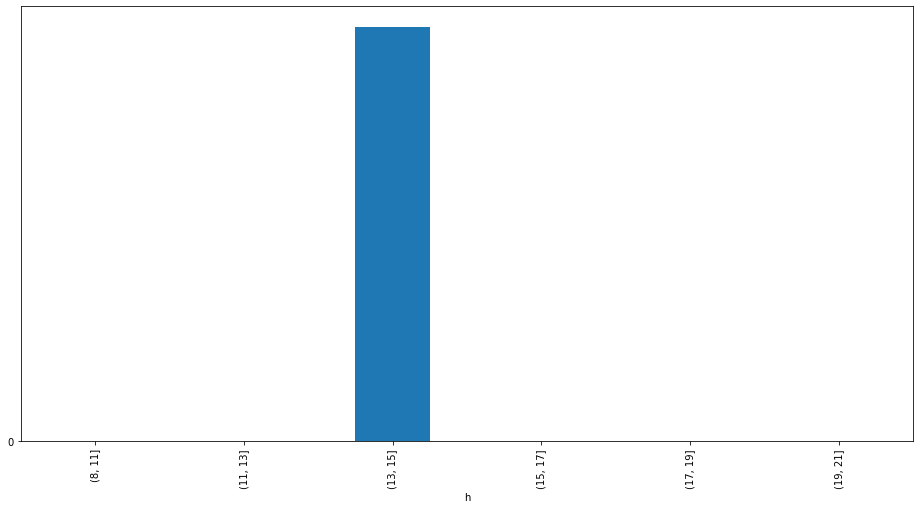

In [416]:
plt.rcParams['figure.figsize'] = [16,8]

plot_df_keskiarvo = df2.groupby(df2_ajat)["aikavälit"].count()

y_ticks = np.arange(len(df2_aikavälit))
plt.yticks(y_ticks)
x_ticks = np.arange(8, 21, 1.0)
plt.xticks(x_ticks)
plt.xlim([8, 21])
plot_df_keskiarvo.plot(kind = 'bar');